## 🔐 Cybersecurity Context in Credit Card Fraud Detection
Credit card fraud is not just a financial concern but a significant cybersecurity threat. Attackers often use techniques like phishing, identity theft, and carding to exploit vulnerabilities in systems and gain unauthorized access to sensitive financial data.

Integrating machine learning with cybersecurity principles helps create more resilient systems that can detect and respond to fraudulent activity in real-time.

## ⚠️ Threat Modeling: Common Credit Card Fraud Techniques
| Threat Type       | Description |
|-------------------|-------------|
| **Phishing**       | Tricking users into revealing card details through fake emails or websites. |
| **Carding**        | Using stolen card numbers to test small transactions before making big purchases. |
| **Identity Theft** | Using someone else's personal data to make unauthorized purchases. |
| **Data Breaches**  | Exploiting system vulnerabilities to extract large datasets of card details. |

## 🧠 Feature Engineering from a Security Lens
In addition to numerical transaction data, modern fraud detection systems often integrate features from user behavior analytics, such as:

- Sudden changes in IP address
- Unusual time of transaction
- Multiple failed login attempts
- Device fingerprint mismatches

## 🛡️ Model Security Considerations
Machine learning models used in fraud detection can themselves be targeted by adversaries. Potential threats include:

- **Model evasion attacks**: Subtle manipulation of input data to avoid detection.
- **Data poisoning attacks**: Corrupting training data to reduce the model's effectiveness.

To mitigate this, models should be monitored, validated regularly, and potentially trained with adversarial robustness techniques.

## ✅ Post-Prediction Security Measures
Once a transaction is flagged as potentially fraudulent, follow-up actions should include:

- Sending real-time alerts to users
- Enabling step-up authentication (e.g., OTP verification)
- Temporary freezing of suspicious accounts

## 🔒 Data Handling & Compliance
When dealing with sensitive transaction data, it's important to follow cybersecurity best practices:

- Use **encryption** for data storage and transmission
- Ensure **anonymization** of personal data during processing
- Comply with standards like **PCI-DSS** and **GDPR**

In [65]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [66]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('C:\\Users\\idhant\\Desktop\\creditcard.csv')

In [67]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [68]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [69]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [70]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [71]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

This Dataset is highly unblanced

0 --> Normal Transaction

1 --> fraudulent transaction

In [72]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [73]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [74]:
# statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [75]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [76]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

In [77]:
legit_sample = legit.sample(n=492)

Concatenating two DataFrames

In [78]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [79]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
282938,171262.0,-0.332958,1.104628,-0.082997,-0.546527,0.130437,-1.053056,0.740795,0.205395,-0.313715,...,-0.194619,-0.509743,0.166628,-0.006363,-0.451926,0.143236,0.122814,0.036539,21.65,0
182600,125471.0,-0.591201,0.015241,0.233591,-2.373755,0.714284,-0.329620,0.187189,0.115741,-0.999984,...,-0.282954,-1.080282,-0.066878,-1.357185,-0.447506,-0.740508,-0.006590,0.170579,29.00,0
78117,57378.0,0.509569,-1.020806,0.979660,1.396195,-1.112006,0.483093,-0.356267,0.261281,0.479081,...,0.392409,0.646972,-0.303985,0.254679,0.273448,-0.289114,0.027034,0.074608,295.73,0
250953,155142.0,2.158525,-1.866187,0.151699,-1.455638,-2.317850,-0.274290,-2.046593,0.257136,-0.470376,...,-0.107020,0.086629,0.366125,-0.015698,-0.673306,-0.264130,0.046011,-0.041987,24.90,0
274651,166142.0,2.051284,0.203127,-1.681013,0.411404,0.521831,-0.782327,0.252241,-0.273701,0.331173,...,-0.340746,-0.834585,0.330494,0.537640,-0.243493,0.171028,-0.054001,-0.027260,8.99,0


In [80]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [81]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [82]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93614.628049,0.123801,-0.035763,0.047184,-0.039473,-0.039713,-0.008522,-0.016222,-0.080255,-0.035357,...,-0.084378,0.021846,-0.001623,0.013116,-0.034721,-0.010685,-0.034663,0.006707,0.013269,80.942744
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Splitting the data into Features & Targets

In [83]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [84]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
282938  171262.0 -0.332958  1.104628 -0.082997 -0.546527  0.130437 -1.053056   
182600  125471.0 -0.591201  0.015241  0.233591 -2.373755  0.714284 -0.329620   
78117    57378.0  0.509569 -1.020806  0.979660  1.396195 -1.112006  0.483093   
250953  155142.0  2.158525 -1.866187  0.151699 -1.455638 -2.317850 -0.274290   
274651  166142.0  2.051284  0.203127 -1.681013  0.411404  0.521831 -0.782327   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [85]:
print(Y)

282938    0
182600    0
78117     0
250953    0
274651    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


Split the data into Training data & Testing Data

In [86]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [87]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


Model Training

Logistic Regression

In [88]:
model = LogisticRegression()

In [89]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

C:\Users\Idhant\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

Accuracy Score

In [90]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [91]:
print(f'Accuracy on Training data : {training_data_accuracy*100:.2f}%')

Accuracy on Training data : 93.52%


In [92]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)


In [93]:
print(f"Accuracy score on Test Data : {test_data_accuracy*100:.2f}%")

Accuracy score on Test Data : 97.46%


In [94]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(X_test_prediction, Y_test)
print(f"Confusion Matix: \n{con_mat}") 

Confusion Matix: 
[[98  4]
 [ 1 94]]


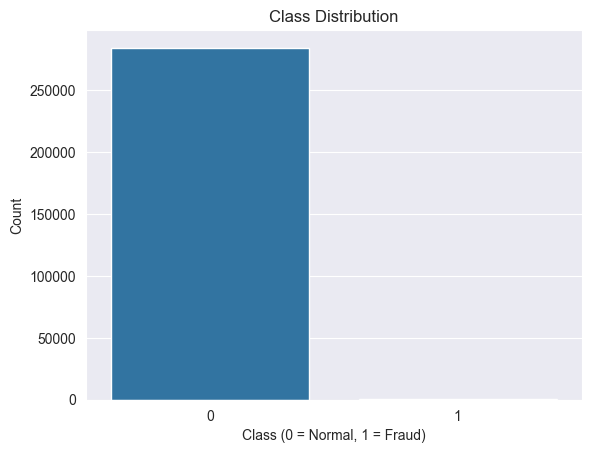

In [95]:
import seaborn as sns

# Load the data (only needed if not already loaded)
df = pd.read_csv('C:\\Users\\Idhant\\Desktop\\creditcard.csv')

# Plotting the class distribution
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.xlabel('Class (0 = Normal, 1 = Fraud)')
plt.ylabel('Count')
plt.show()


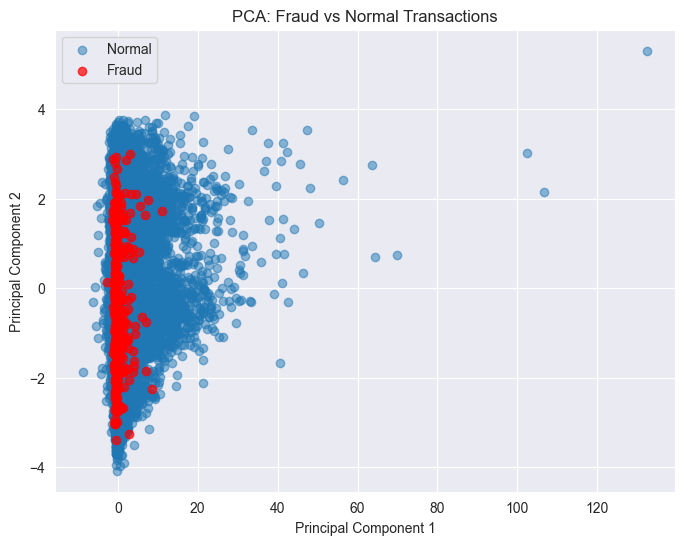

In [96]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# Load the dataset
credit_card_data = pd.read_csv('C:\\Users\\Idhant\\Desktop\\creditcard.csv')

# Separate features and labels
X = credit_card_data.drop('Class', axis=1)
y = credit_card_data['Class']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

# Plot PCA visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[y==0, 0], X_reduced[y==0, 1], label="Normal", alpha=0.5)
plt.scatter(X_reduced[y==1, 0], X_reduced[y==1, 1], label="Fraud", alpha=0.7, color='red')
plt.legend()
plt.title('PCA: Fraud vs Normal Transactions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

C:\Users\Idhant\miniconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
C:\Users\Idhant\miniconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Idhant\miniconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Idhant\miniconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Idhant\miniconda3\Lib\subprocess.py", line 1026, in 

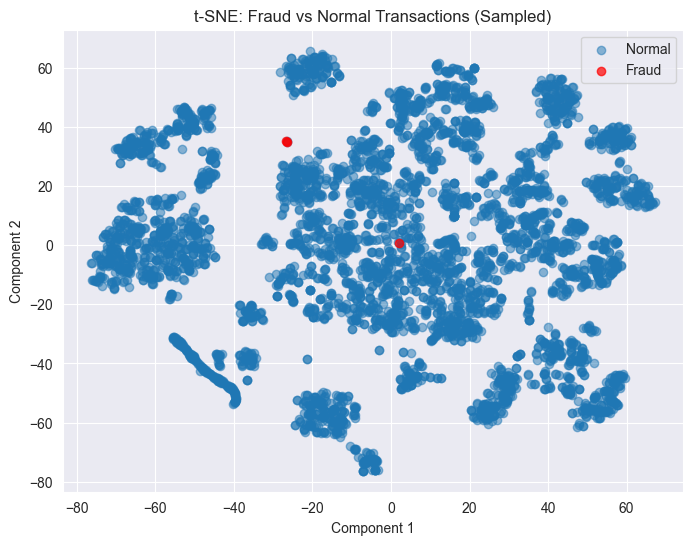

In [97]:
from sklearn.manifold import TSNE

# Run t-SNE on a smaller sample for speed (optional but recommended)
X_sample = X_scaled[:5000]
y_sample = y[:5000]

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_sample)

# Plot t-SNE visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[y_sample==0, 0], X_tsne[y_sample==0, 1], label="Normal", alpha=0.5)
plt.scatter(X_tsne[y_sample==1, 0], X_tsne[y_sample==1, 1], label="Fraud", alpha=0.7, color='red')
plt.legend()
plt.title('t-SNE: Fraud vs Normal Transactions (Sampled)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()



Training Logistic Regression...
Logistic Regression - F1 Score: 0.9583
Logistic Regression - Precision: 0.9787
Logistic Regression - Recall: 0.9388


C:\Users\Idhant\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


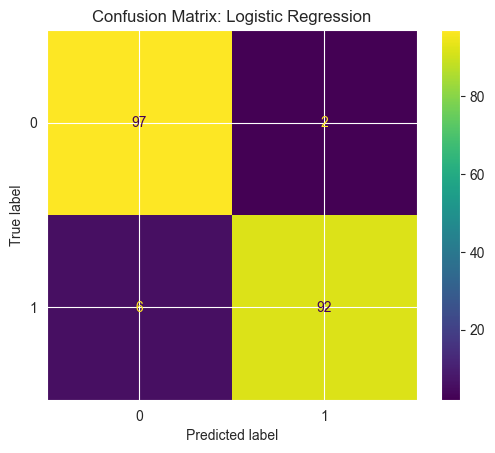


Training Random Forest...
Random Forest - F1 Score: 0.9529
Random Forest - Precision: 0.9785
Random Forest - Recall: 0.9286


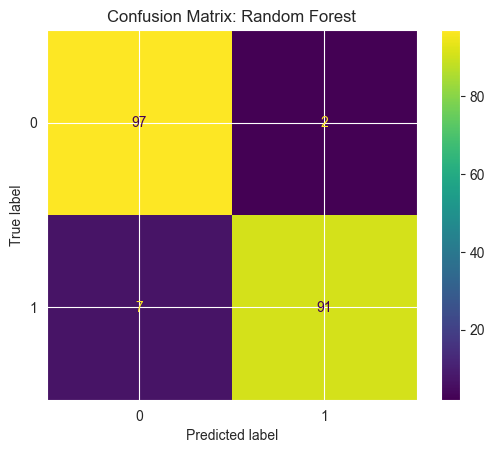


Training XGBoost...
XGBoost - F1 Score: 0.9588
XGBoost - Precision: 0.9688
XGBoost - Recall: 0.9490


C:\Users\Idhant\miniconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:57:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


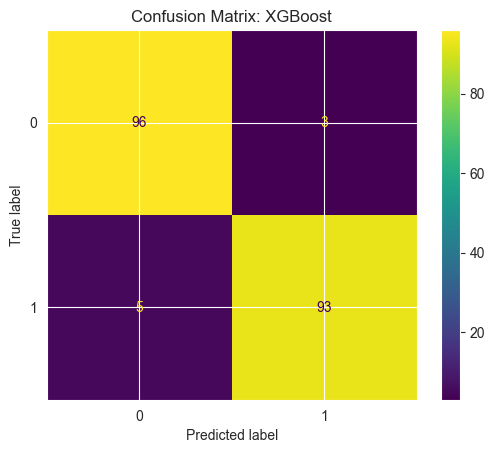

In [104]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

# Models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    
    f1 = f1_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    
    print(f"{name} - F1 Score: {f1:.4f}")
    print(f"{name} - Precision: {precision:.4f}")
    print(f"{name} - Recall: {recall:.4f}")
    
    cm = confusion_matrix(Y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.title(f'Confusion Matrix: {name}')
    plt.show()